## Importing Libraries

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split  # for splitting the dataset
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [12]:
dataset1=pd.read_csv("OnlineNewsPopularity.csv")

In [41]:
np.median(dataset1['shares'])

1400.0

In [14]:
dataset1['popularity'] = ['popular' if x >= 1400 else 'unpopular' for x in dataset1['shares']]

In [43]:
dataset1.shape

(39644, 62)

In [15]:
dataset1.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,popularity
0,http://mashable.com/2013/01/07/amazon-instant-...,731,12,219,0.663594,1.0,0.815385,4,2,1,...,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,unpopular
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731,9,255,0.604743,1.0,0.791946,3,1,1,...,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,unpopular
2,http://mashable.com/2013/01/07/apple-40-billio...,731,9,211,0.575130,1.0,0.663866,3,1,1,...,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,popular
3,http://mashable.com/2013/01/07/astronaut-notre...,731,9,531,0.503788,1.0,0.665635,9,0,1,...,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,unpopular
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731,13,1072,0.415646,1.0,0.540890,19,19,20,...,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,unpopular


In [19]:
# separate the dependent and independent attributes.
x = dataset1.iloc[:,2:-2].values
x

array([[ 1.20000000e+01,  2.19000000e+02,  6.63594467e-01, ...,
        -1.87500000e-01,  0.00000000e+00,  1.87500000e-01],
       [ 9.00000000e+00,  2.55000000e+02,  6.04743081e-01, ...,
         0.00000000e+00,  5.00000000e-01,  0.00000000e+00],
       [ 9.00000000e+00,  2.11000000e+02,  5.75129531e-01, ...,
         0.00000000e+00,  5.00000000e-01,  0.00000000e+00],
       ...,
       [ 1.00000000e+01,  4.42000000e+02,  5.16355139e-01, ...,
         1.36363636e-01,  4.54545450e-02,  1.36363636e-01],
       [ 6.00000000e+00,  6.82000000e+02,  5.39493293e-01, ...,
         0.00000000e+00,  5.00000000e-01,  0.00000000e+00],
       [ 1.00000000e+01,  1.57000000e+02,  7.01986750e-01, ...,
         2.50000000e-01,  1.66666667e-01,  2.50000000e-01]])

In [20]:
y = dataset1.iloc[:, -1].values
y

array(['unpopular', 'unpopular', 'popular', ..., 'popular', 'unpopular',
       'unpopular'], dtype=object)

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

In [23]:
# model initialization
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)

In [24]:
ls = [y_test != y_pred]
len(ls) # number of mis-classification.

1

### According to the confusion matrix gotten by comparing the predicted classes to the test classes,This gives an accuracy of 57.611%.

In [25]:
# to find the accuracy score in terms of %

print("KNN score =",knn.score(x_test,y_test)*100)

KNN score = 57.61130029007441


In [27]:
# alternatively

from sklearn import metrics

print("accuracy =",metrics.accuracy_score(y_test,y_pred))

accuracy = 0.5761130029007441


In [28]:
# compute confusion matrix

labels = ['popular','unpopular']
cm = confusion_matrix(y_test,y_pred,labels)
print("confusion matrix is:",cm,sep = '\n')

# columns = predicted class
# rows = actual class

confusion matrix is:
[[2556 1634]
 [1727 2012]]


In [30]:
def precision(label,confusion_matrix):
    col = confusion_matrix[:,label]
    return confusion_matrix[label,label] / col.sum()

def recall(label,confusion_matrix):
    row = confusion_matrix[label,:]
    return confusion_matrix[label,label] / row.sum()

print("label precision recall")
for label in range(0,2):
    print(f"{label : 5d} {precision(label,cm) : 9.3f} {recall(label,cm) : 6.3f}")

label precision recall
    0     0.597  0.610
    1     0.552  0.538


In [31]:
k_list = [i for i in range(1,30)]

In [38]:
mis_class = []
for i in k_list:
    knn = KNeighborsClassifier(n_neighbors = i) 
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_test)
    cm = confusion_matrix(y_test,y_pred)
    mis_class.append(np.mean(y_pred != y_test)) 

In [39]:
print(mis_class)

[0.442804893429184, 0.43271534871988904, 0.42388699709925587, 0.4141758103165595, 0.4193467019800731, 0.4135452137722285, 0.41707655442048175, 0.41657207718501704, 0.4136713330810947, 0.40257283390087023, 0.4052213393870602, 0.40534745869592637, 0.40736536763778536, 0.4037079076806659, 0.4068608904023206, 0.4013116408122083, 0.4057258166225249, 0.40244671459200404, 0.40623029385798964, 0.4015638794299407, 0.4015638794299407, 0.4000504477235465, 0.3997982091058141, 0.3999243284146803, 0.3996720897969479, 0.39828477739941986, 0.39866313532601844, 0.3958885105309623, 0.4000504477235465]


Text(0, 0.5, 'total error')

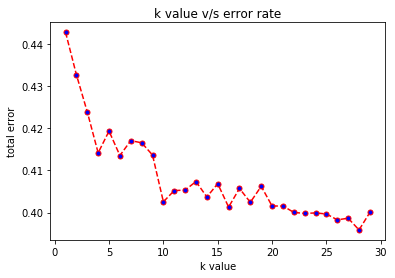

In [40]:
plt.plot(k_list,mis_class,color = 'red',linestyle = 'dashed',marker = 'o',markerfacecolor = 'blue',markersize = 5)
plt.title('k value v/s error rate')
plt.xlabel('k value')
plt.ylabel('total error') 

##### from the output,we can see that the error decreases if we increase k